# Predicting the cost of used cars [MachineHack Hacakthon]

<img src='car3.jpg' style='height:350px;width:100%'/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'car_price_regression.ipynb',
 'Data_Test.xlsx',
 'Data_Train.xlsx',
 'machine_hack_car_price.rar',
 'Participants_Data_Used_Cars',
 'Participants_Data_Used_Cars.zip',
 'Sample_submission.xlsx',
 'Untitled.ipynb',
 'Untitled3.ipynb',
 '~$Data_Train.xlsx']

In [3]:
train_df = pd.read_excel('Data_Train.xlsx')

In [4]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
train_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
train_df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [9]:
train_df.Name.value_counts(ascending=False)

Mahindra XUV500 W8 2WD                        49
Maruti Swift VDI                              45
Honda City 1.5 S MT                           34
Maruti Swift Dzire VDI                        34
Maruti Swift VDI BSIV                         31
Maruti Ritz VDi                               30
Hyundai i10 Sportz                            30
Toyota Fortuner 3.0 Diesel                    29
Honda Amaze S i-Dtech                         27
Hyundai Grand i10 Sportz                      27
Maruti Ertiga VDI                             25
Honda Brio S MT                               25
Honda City 1.5 V MT                           24
Maruti Wagon R VXI                            23
Hyundai Verna 1.6 SX                          23
Maruti Wagon R LXI                            22
Maruti Alto LXi                               21
BMW 3 Series 320d                             20
Maruti Ertiga ZDI                             20
Maruti Alto 800 LXI                           20
Hyundai EON Era Plus

In [10]:
pd.set_option('display.max_rows',15)

In [11]:
train_df.Name.nunique()

1876

In [12]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Data engineering on *Engine* , *Power* and *Mileage* columns

In [13]:
train_df[['power','hp']] = train_df.Power.str.split(expand=True)

In [99]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'power', 'hp'],
      dtype='object')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5983 non-null object
hp                   5983 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 705.4+ KB


In [15]:
train_df.hp.value_counts()

bhp    5983
Name: hp, dtype: int64

#### Since hp column only contains 'bhp' we can remove the hp col 

In [16]:
train_df.drop(columns=['Power','hp'],inplace=True)

In [18]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,power
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,5.0,NaN,1.75,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,NaN,12.50,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,8.61 Lakh,4.50,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,NaN,6.00,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,NaN,17.74,140.8


### Feature Engineering on *Mileage* column:-

In [19]:
train_df[['mileage','mil_unit']] = train_df.Mileage.str.split(expand=True)

In [20]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,power,mileage,mil_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,5.0,NaN,1.75,58.16,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.0,NaN,12.50,126.2,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.0,8.61 Lakh,4.50,88.7,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.0,NaN,6.00,88.76,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.0,NaN,17.74,140.8,15.2,kmpl


In [21]:
train_df.mil_unit.value_counts()

kmpl     5951
km/kg      66
Name: mil_unit, dtype: int64

#### Since litre and Kg are almost equivalent, no need to convert km/kg to kmpl . Detailed conversion can be found in the link below
https://en.m.wikipedia.org/wiki/Litre

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5983 non-null object
mileage              6017 non-null object
mil_unit             6017 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 705.4+ KB


In [23]:
train_df.drop(columns=['mil_unit','Mileage'],inplace=True)

In [24]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,power,mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.0,NaN,1.75,58.16,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.0,NaN,12.50,126.2,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.0,8.61 Lakh,4.50,88.7,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.0,NaN,6.00,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.0,NaN,17.74,140.8,15.2


In [25]:
train_df.Engine.str.contains('CC').sum()

5983

#### This shows all the entries in Engine col contains 'CC' as suffix.

In [26]:
train_df.Engine.count()

5983

In [27]:
train_df[['cc','cc_unit']] = train_df.Engine.str.split(expand=True)

In [28]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,power,mileage,cc,cc_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.0,NaN,1.75,58.16,26.6,998,CC
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.0,NaN,12.50,126.2,19.67,1582,CC
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.0,8.61 Lakh,4.50,88.7,18.2,1199,CC
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.0,NaN,6.00,88.76,20.77,1248,CC
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.0,NaN,17.74,140.8,15.2,1968,CC


In [29]:
train_df.drop(columns=['Engine','cc_unit'],inplace=True)

In [30]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.6,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.2,19.67,1582
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.7,18.2,1199
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.8,15.2,1968


### Now the power,mileage and cc columns are properly engineered

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5983 non-null object
mileage              6017 non-null object
cc                   5983 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


#### *the datatype of power,mileage and cc columns are 'object' . We will change it to float*

In [32]:
train_df.power.describe()

count     5983
unique     372
top         74
freq       235
Name: power, dtype: object

In [33]:
train_df.power.value_counts(ascending=False,dropna=False)

74        235
98.6      131
73.9      125
140       123
78.9      111
67.04     107
null      107
         ... 
362.9       1
175.67      1
178.4       1
71.01       1
560         1
110.5       1
95          1
Name: power, Length: 373, dtype: int64

#### 107 entries in power column contains the word 'null' . We will replace it to __'np.NaN'__

In [34]:
train_df.power.str.contains('null').sum()

107

In [35]:
train_df.power.isna().sum()

36

#### power column already contains 36 NA values and 107 entries with 'null'. We will replace the 'null' with NA.
#### After replacing the total NA entries will be 107 + 36 = 143

In [36]:
train_df.loc[train_df.power == 'null','power'] = np.NaN

In [37]:
train_df.power.isna().sum()

143

In [38]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.6,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.2,19.67,1582
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.7,18.2,1199
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.8,15.2,1968


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5876 non-null object
mileage              6017 non-null object
cc                   5983 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


#### now we can change the datatype of power column to 'float'

In [40]:
train_df.power = train_df.power.astype('float')

In [41]:
train_df.mileage = train_df.mileage.astype('float')

In [42]:
train_df.cc = train_df.cc.astype('float')

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5876 non-null float64
mileage              6017 non-null float64
cc                   5983 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


#### The datatype of power, mileage and cc column has been changed to 'float'

In [44]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0


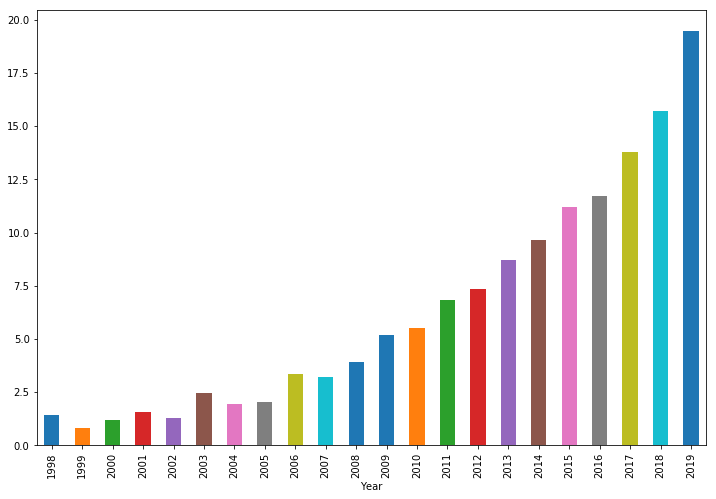

In [45]:
plt.figure(figsize=(12,8))
train_df.groupby('Year').Price.mean().plot(kind='bar')
plt.show()

### *This shows a clear trend of newer the car is , more will be its price

In [46]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0


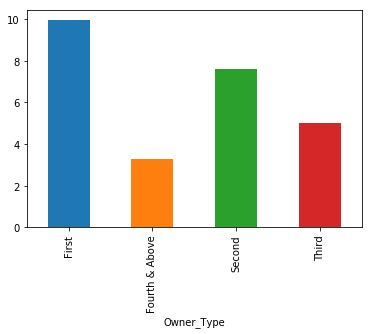

In [47]:
train_df.groupby(['Owner_Type']).Price.mean().plot(kind='bar')
plt.show()

### *Clear trend showing the first hand cars sold at higher prices. As expected

In [48]:
train_df[['Brand','car_name']] = train_df.Name.str.split(' ',n=1,expand=True)

In [49]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic


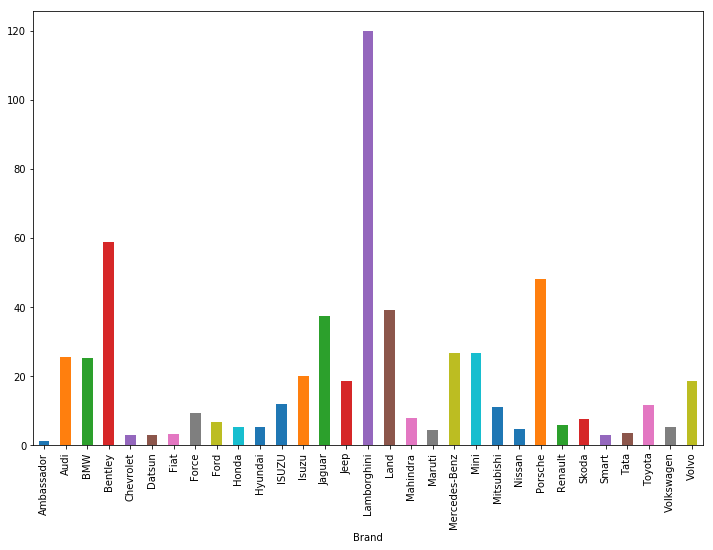

In [50]:
plt.figure(figsize=(12,8))
train_df.groupby(['Brand']).Price.mean().plot(kind='bar')
plt.show()

#### *Big towers clearly shows the Expensive Cars, as expected Lamboghini,Porshe,Bently leading the chart

In [51]:
train_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  42
New_Price            5195
Price                   0
power                 143
mileage                 2
cc                     36
Brand                   0
car_name                0
dtype: int64

#### Now we need to fill the missing data in a effective way. We will start with seats columns

In [52]:
train_df.loc[train_df.Seats.isna(),'Name'].nunique()

23

In [53]:
train_df.loc[train_df.Seats.isna(),'Name'].unique()

array(['Honda City 1.5 GXI', 'Maruti Swift 1.3 VXi', 'Ford Figo Diesel',
       'Land Rover Range Rover 3.0 D', 'Honda City 1.3 DX',
       'Maruti Swift 1.3 ZXI',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Honda City 1.5 EXI', 'Maruti Swift 1.3 LXI',
       'Hyundai Santro LP zipPlus', 'Toyota Etios Liva V',
       'Maruti Swift 1.3 VXI ABS', 'Maruti Estilo LXI',
       'BMW 5 Series 520d Sedan', 'Hyundai Santro GLS II - Euro II',
       'Maruti Wagon R Vx', 'Ford Endeavour Hurricane LE',
       'Honda CR-V AT With Sun Roof', 'Fiat Punto 1.3 Emotion',
       'Hyundai Santro Xing XG', 'Honda Jazz Select Edition',
       'Fiat Punto 1.2 Dynamic', 'Fiat Punto 1.4 Emotion'], dtype=object)

In [54]:
train_df.loc[train_df.Name == 'Honda City 1.5 GXI','Seats']

194     NaN
1385    NaN
3305    5.0
4767    5.0
5270    NaN
Name: Seats, dtype: float64

In [55]:
train_df.loc[train_df.Name == 'Maruti Swift 1.3 VXi','Seats'].mean()

nan

In [56]:
car_seat_dic = {}
for i in train_df.loc[train_df.Seats.isna(),'Name'].unique():
    car_seat_dic[i] = train_df.loc[train_df.Name == i,'Seats'].mean()

In [57]:
car_seat_dic

{'Honda City 1.5 GXI': 5.0,
 'Maruti Swift 1.3 VXi': nan,
 'Ford Figo Diesel': nan,
 'Land Rover Range Rover 3.0 D': nan,
 'Honda City 1.3 DX': nan,
 'Maruti Swift 1.3 ZXI': nan,
 'Land Rover Range Rover Sport 2005 2012 Sport': nan,
 'Honda City 1.5 EXI': 5.0,
 'Maruti Swift 1.3 LXI': nan,
 'Hyundai Santro LP zipPlus': nan,
 'Toyota Etios Liva V': 5.0,
 'Maruti Swift 1.3 VXI ABS': nan,
 'Maruti Estilo LXI': nan,
 'BMW 5 Series 520d Sedan': nan,
 'Hyundai Santro GLS II - Euro II': nan,
 'Maruti Wagon R Vx': nan,
 'Ford Endeavour Hurricane LE': nan,
 'Honda CR-V AT With Sun Roof': nan,
 'Fiat Punto 1.3 Emotion': nan,
 'Hyundai Santro Xing XG': nan,
 'Honda Jazz Select Edition': 5.0,
 'Fiat Punto 1.2 Dynamic': nan,
 'Fiat Punto 1.4 Emotion': nan}

In [58]:
train_df[train_df.Name == 'Honda CR-V AT With Sun Roof']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,NaN,NaN,11.99,NaN,14.0,NaN,Honda,CR-V AT With Sun Roof


#### As we can see out of 42 missing entries of Seats col..there are 23 unique entries which is stored in car_sear_dic...
#### and out of these 23 unique entries , for only 4 cars information about the seats is mentioned on the other entries in the df.
#### So we need to manually fill the seat infos about rest of the cars from internet and fill the values in the Seat column 

In [59]:
latest_car_seat_dic = {'Honda City 1.5 GXI': 5.0,
 'Maruti Swift 1.3 VXi': 5,
 'Ford Figo Diesel': 5,
 'Land Rover Range Rover 3.0 D': 5,
 'Honda City 1.3 DX': 5,
 'Maruti Swift 1.3 ZXI': 5,
 'Land Rover Range Rover Sport 2005 2012 Sport': 5,
 'Honda City 1.5 EXI': 5.0,
 'Maruti Swift 1.3 LXI': 5,
 'Hyundai Santro LP zipPlus': 5,
 'Toyota Etios Liva V': 5.0,
 'Maruti Swift 1.3 VXI ABS': 5,
 'Maruti Estilo LXI': 5,
 'BMW 5 Series 520d Sedan': 5,
 'Hyundai Santro GLS II - Euro II': 5,
 'Maruti Wagon R Vx': 5,
 'Ford Endeavour Hurricane LE': 7,
 'Honda CR-V AT With Sun Roof': 5,
 'Fiat Punto 1.3 Emotion': 5,
 'Hyundai Santro Xing XG': 5,
 'Honda Jazz Select Edition': 5.0,
 'Fiat Punto 1.2 Dynamic': 5,
 'Fiat Punto 1.4 Emotion': 5}

In [60]:
train_df.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [61]:
train_df.loc[train_df.Seats == 0,'Seats'] = 5

In [62]:
train_df.loc[train_df.Seats == 10]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,10.0,NaN,3.50,75.0,13.10,2446.0,Toyota,Qualis FS B2
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,10.0,NaN,5.25,83.1,14.07,1978.0,Tata,Sumo DX
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,10.0,NaN,3.65,75.0,13.10,2446.0,Toyota,Qualis FS B3
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,10.0,NaN,3.50,NaN,0.00,2446.0,Toyota,Qualis RS E2
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,10.0,NaN,5.50,80.0,14.80,2499.0,Chevrolet,Tavera LS B3 10 Seats BSIII


In [63]:
def test(df):
    if latest_car_seat_dic.get(df.Name) == None:
        return(df.Seats)
    else:
        return(latest_car_seat_dic[df.Name])

In [64]:
train_df.Seats = train_df.apply(test,axis=1)

In [65]:
train_df.Seats.isna().sum()

0

In [66]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5876 non-null float64
mileage              6017 non-null float64
cc                   5983 non-null float64
Brand                6019 non-null object
car_name             6019 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 705.4+ KB


In [67]:
train_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price            5195
Price                   0
power                 143
mileage                 2
cc                     36
Brand                   0
car_name                0
dtype: int64

#### missing values of the Seats col has been taken care of

In [68]:
train_df.loc[train_df.mileage.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,5.0,13.58 Lakh,13.00,41.0,NaN,72.0,Mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,5.0,NaN,12.75,73.0,NaN,1798.0,Toyota,Prius 2009-2016 Z4


In [74]:
train_df.loc[train_df.Name == 'Mahindra E Verito D4' ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,5.0,13.58 Lakh,13.0,41.0,NaN,72.0,Mahindra,E Verito D4


In [75]:

train_df.loc[train_df.Name == 'Toyota Prius 2009-2016 Z4' ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,5.0,NaN,12.75,73.0,NaN,1798.0,Toyota,Prius 2009-2016 Z4


#### we need to search for the mileage of above mentioned in the internet and then fill it up

#### upon searching in internet , it is found that the above mentioned vehicles are electric so mileage is not mentioned in kmpl
#### I will replace it with the average mileage of the cars 

In [76]:
train_df.groupby(['Brand']).mileage.mean()

Brand
Ambassador    12.800000
Audi          15.171780
BMW           16.989700
Bentley        8.600000
Chevrolet     18.401157
Datsun        21.590769
Fiat          17.375000
                ...    
Renault       20.704759
Skoda         16.781445
Smart          0.000000
Tata          19.839731
Toyota        14.380390
Volkswagen    18.258889
Volvo         15.493333
Name: mileage, Length: 31, dtype: float64

In [77]:
train_df.mileage.describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: mileage, dtype: float64

As we can see there are some mileage which are zero , need to take care of that

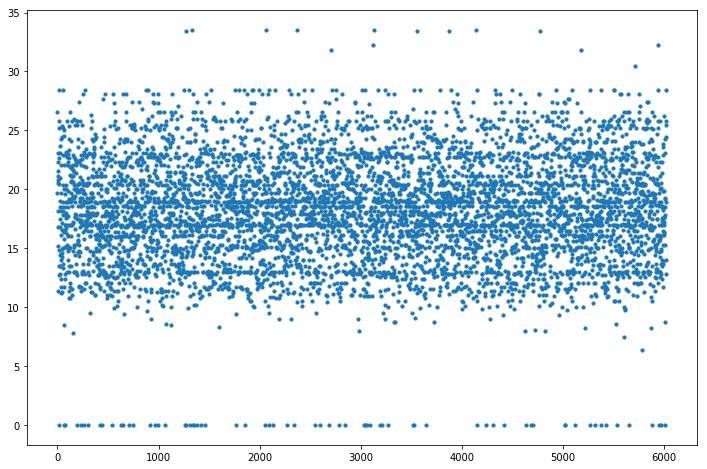

In [78]:
plt.figure(figsize=(12,8))
plt.scatter(x=train_df.index,y=train_df.mileage,s = 10)
plt.show()

### as we can see there are many entries where mileage is 0 , which are outliers need to remove the outliers

In [79]:
train_df.loc[train_df.mileage < 1,'mileage'].count()

68

#### so there are 68 entries,which needed to be taken care of... GREAT :)

In [80]:
outlier_mil_df = train_df.loc[train_df.mileage < 1]

In [81]:
outlier_mil_df.groupby(['Brand']).Brand.count()

Brand
Audi              1
Fiat              1
Ford              1
Honda             3
Hyundai          32
Land              9
Mahindra          2
Maruti            1
Mercedes-Benz    12
Skoda             2
Smart             1
Toyota            2
Volkswagen        1
Name: Brand, dtype: int64

In [82]:
train_df['brand_mean_mil'] = train_df.groupby('Brand').mileage.transform('mean')

In [83]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0,Honda,Jazz V,18.397204
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0,Maruti,Ertiga VDI,21.505681
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780


In [84]:
train_df.loc[train_df.mileage < 1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,5.0,NaN,17.50,115.0,0.0,2179.0,Land,Rover Freelander 2 TD4 SE,10.959167
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,5.0,49.14 Lakh,35.67,194.0,0.0,1950.0,Mercedes-Benz,C-Class Progressive C 220d,13.891761
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,5.0,NaN,1.30,NaN,0.0,1086.0,Hyundai,Santro Xing XL,18.729106
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,5.0,NaN,2.95,NaN,0.0,NaN,Honda,City 1.5 GXI,18.397204
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,5.0,NaN,3.60,99.0,0.0,1498.0,Ford,Figo Diesel,18.468167
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,5.0,NaN,1.75,NaN,0.0,1086.0,Hyundai,Santro Xing XL,18.729106
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,5.0,NaN,1.50,NaN,0.0,1086.0,Hyundai,Santro Xing XL,18.729106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5426,Hyundai Santro Xing XL,Chennai,2006,85000,Petrol,Manual,Third,5.0,NaN,1.30,NaN,0.0,1086.0,Hyundai,Santro Xing XL,18.729106
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,5.0,NaN,1.75,NaN,0.0,999.0,Hyundai,Santro LP - Euro II,18.729106


In [88]:
def outlier_mileage(df):
    if df.mileage < 1:
        return(df.brand_mean_mil)
    else:
        return(df.mileage)

In [89]:
train_df.mileage = train_df.apply(outlier_mileage,axis=1)

In [90]:
train_df.loc[train_df.mileage < 1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,2.0,NaN,3.0,NaN,0.0,799.0,Smart,Fortwo CDI AT,0.0


### still one remains...phew


In [91]:
train_df.mileage.mean()

18.318285208739777

In [92]:
train_df.loc[train_df.mileage < 1,'mileage'] = train_df.mileage.mean()

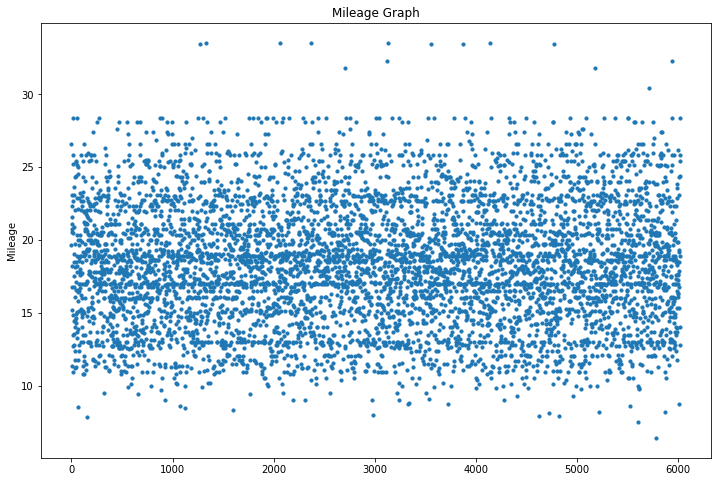

In [93]:
plt.figure(figsize=(12,8))
plt.scatter(x=train_df.index,y=train_df.mileage,s = 10)
plt.ylabel('Mileage')
plt.title('Mileage Graph')
plt.show()

### as u can see finally the outlier in mileage has been taken care of..SIGH !!!

In [94]:
import seaborn as sns

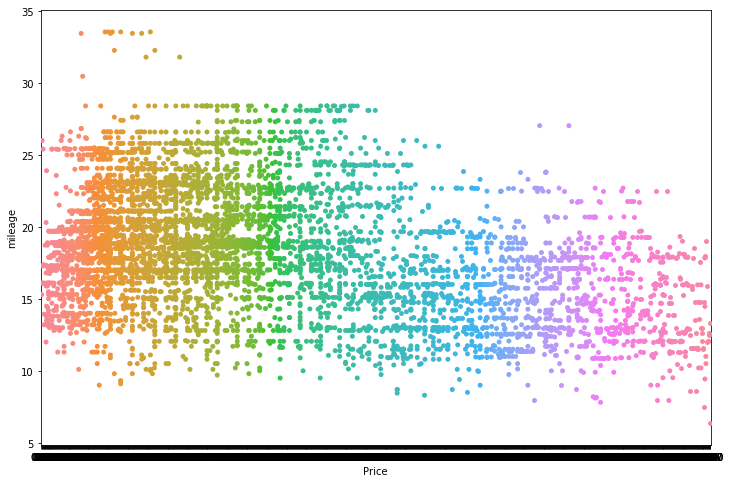

In [95]:
plt.figure(figsize=(12,8))
sns.stripplot(data=train_df,y='mileage',x='Price')
plt.show()

### As we can see the lower price cars give a high mileage, but still the relationship is not that clear

In [96]:
train_df.Price.corr(train_df.mileage)

-0.3369582049450797

In [97]:
train_df.mileage.value_counts(bins=5)

(17.256, 22.684]    2463
(11.828, 17.256]    2155
(22.684, 28.112]     995
(6.372, 11.828]      350
(28.112, 33.54]       54
Name: mileage, dtype: int64

In [98]:
train_df.mileage.isna().sum()

2

In [100]:
train_df.loc[train_df.mileage.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,5.0,13.58 Lakh,13.00,41.0,NaN,72.0,Mahindra,E Verito D4,15.051144
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,5.0,NaN,12.75,73.0,NaN,1798.0,Toyota,Prius 2009-2016 Z4,14.380390


In [101]:
train_df.mileage = train_df.mileage.fillna(train_df.brand_mean_mil)

In [102]:
train_df.iloc[4446]

Name                 Mahindra E Verito D4
Location                          Chennai
Year                                 2016
Kilometers_Driven                   50000
Fuel_Type                        Electric
Transmission                    Automatic
Owner_Type                          First
                             ...         
Price                                  13
power                                  41
mileage                           15.0511
cc                                     72
Brand                            Mahindra
car_name                      E Verito D4
brand_mean_mil                    15.0511
Name: 4446, Length: 16, dtype: object

In [104]:
train_df.loc[train_df.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil


In [105]:
mil_bins = [-1,11,16,20,25,29.5,100]
mil_label = ['mil_'+str(i) for i in range(1,7)]
train_df['mil_category'] = pd.cut(train_df.mileage,bins=mil_bins,labels=mil_label)

In [106]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0,Honda,Jazz V,18.397204,mil_3
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0,Maruti,Ertiga VDI,21.505681,mil_4
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2


In [107]:
train_df.mil_category.value_counts()

mil_3    2315
mil_2    1613
mil_4    1506
mil_5     409
mil_1     162
mil_6      14
Name: mil_category, dtype: int64

In [108]:
train_df.groupby(['mil_category']).Price.mean()

mil_category
mil_1    20.170988
mil_2    14.663577
mil_3     8.142294
mil_4     5.984263
mil_5     5.450416
mil_6     3.281429
Name: Price, dtype: float64

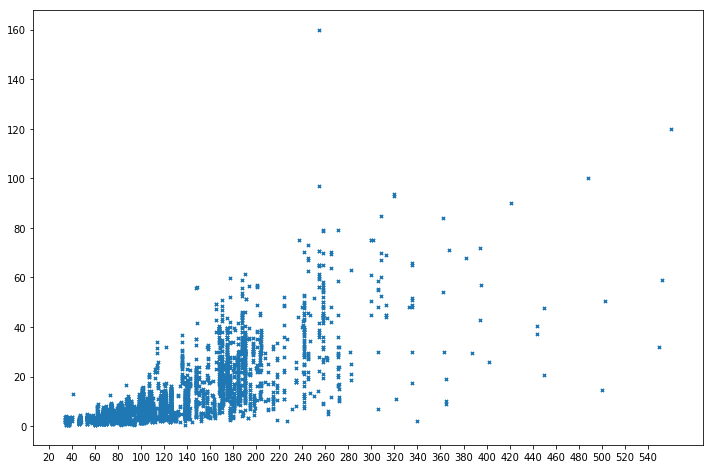

In [109]:
plt.figure(figsize=(12,8))
plt.xticks(np.arange(0,train_df.power.max(),20))
plt.scatter(y=train_df.Price,x=train_df.power,s=10,marker='x',)
plt.show()

In [110]:
train_df.power.corr(train_df.Price)

0.7725658004912165

### *power has a very strong reltionship with the price, so this can be one very impotant feature analysis

In [111]:
train_df.Price.describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [112]:
train_df.power.isna().sum()

143

In [113]:
train_df.loc[train_df.power.isna(),'Name'].value_counts(ascending=False)

Maruti Swift VDI BSIV                      11
Hyundai Santro Xing XL eRLX Euro III        7
Maruti Swift 1.3 VXi                        6
Toyota Etios GD                             6
Toyota Etios Liva GD                        5
Hyundai Santro Xing XO eRLX Euro II         5
Maruti Swift VDI BSIV W ABS                 5
                                           ..
Hyundai Santro GS                           1
Audi A4 3.2 FSI Tiptronic Quattro           1
Toyota Etios Liva V                         1
Hyundai Santro Xing XL AT eRLX Euro III     1
Hyundai Santro Xing XO CNG                  1
Hyundai Santro Xing XL AT eRLX Euro II      1
Hyundai Santro LS zipPlus                   1
Name: Name, Length: 70, dtype: int64

In [114]:
train_df.loc[train_df.Name == 'Maruti Swift VDI BSIV','power'].mean()

74.0

In [115]:
train_df.loc[train_df.Name == 'Hyundai Santro Xing XO','power'].mean()

nan

In [116]:
train_df.isna().sum().sort_values(ascending=False)

New_Price            5195
power                 143
cc                     36
Owner_Type              0
Location                0
Year                    0
Kilometers_Driven       0
                     ... 
Seats                   0
brand_mean_mil          0
Price                   0
mileage                 0
Brand                   0
car_name                0
Name                    0
Length: 17, dtype: int64

In [117]:
train_df['mean_cc'] = train_df.groupby(['Brand']).cc.transform('mean')

In [118]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475


In [119]:
train_df.cc.fillna(train_df.mean_cc,inplace=True)

In [120]:
train_df.cc.isna().sum()

0

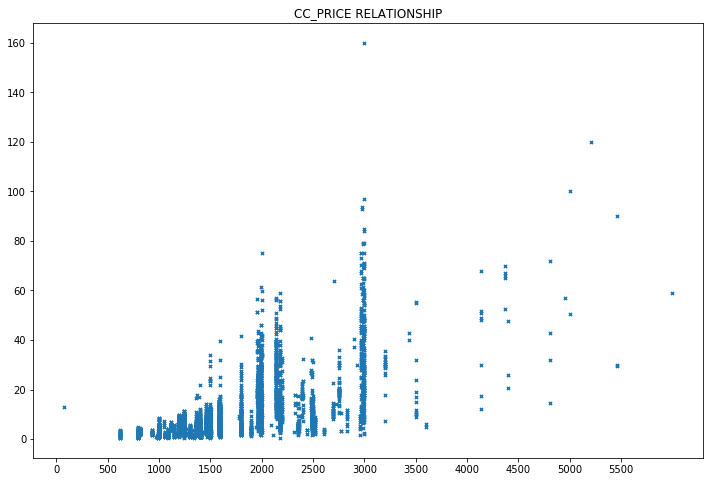

In [121]:
plt.figure(figsize=(12,8))
plt.scatter(x=train_df.cc,y=train_df.Price,s=10,marker='x')
plt.xticks(np.arange(0,train_df.cc.max(),500))
plt.title('CC_PRICE RELATIONSHIP')
plt.show()

In [122]:
train_df.cc.describe()

count    6019.000000
mean     1620.877169
std       600.762450
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: cc, dtype: float64

In [123]:
train_df.cc.corr(train_df.Price)

0.6588386641246271

### Strong relationship between cc and price of the cars

In [124]:
train_df.cc.value_counts(bins=7,ascending=False)

(918.571, 1765.143]     3813
(1765.143, 2611.714]    1485
(2611.714, 3458.286]     425
(66.073, 918.571]        254
(3458.286, 4304.857]      22
(4304.857, 5151.429]      15
(5151.429, 5998.0]         5
Name: cc, dtype: int64

In [125]:
cc_bins = [-1,1000,1800,2650,3500,4350,5200,10000]
cc_label = ['cc_'+str(i) for i in range(1,8)]
train_df['cc_category'] = pd.cut(train_df.cc,bins=cc_bins,labels=cc_label)

In [126]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3


In [127]:
train_df.groupby(['cc_category']).Price.mean()

cc_category
cc_1     2.902585
cc_2     5.392146
cc_3    16.452303
cc_4    28.683890
cc_5    33.745000
cc_6    52.224667
cc_7    65.700000
Name: Price, dtype: float64

In [130]:
train_df.isnull().sum().sort_values(ascending=False)

New_Price            5195
power                 143
cc_category             0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
                     ... 
mileage                 0
cc                      0
Brand                   0
car_name                0
brand_mean_mil          0
mil_category            0
Name                    0
Length: 19, dtype: int64

In [131]:
train_df.loc[train_df.power.isna(),'Name'].nunique()

70

In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Seats                6019 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
power                5876 non-null float64
mileage              6019 non-null float64
cc                   6019 non-null float64
Brand                6019 non-null object
car_name             6019 non-null object
brand_mean_mil       6019 non-null float64
mil_category         6019 non-null category
mean_cc              6019 non-null float64
cc_category          6019 non-null category
dtypes: category(2), float64(7), int64(2), object(8)
memory usage: 811.8+ KB


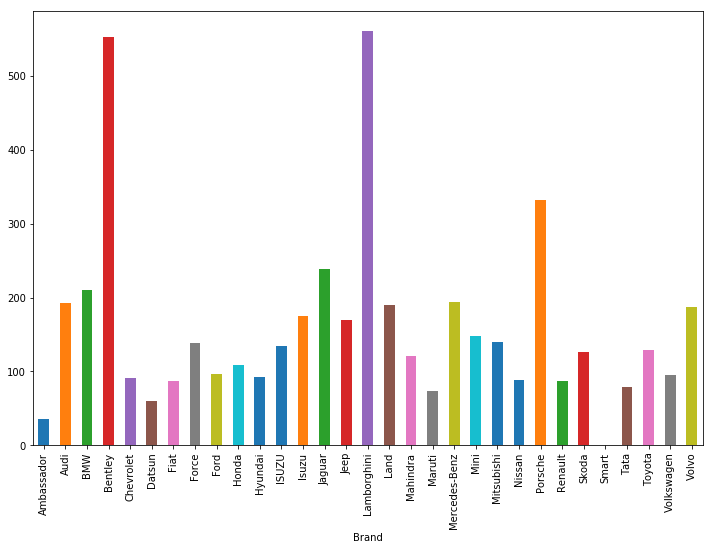

In [133]:
plt.figure(figsize=(12,8))
train_df.groupby('Brand').power.mean().plot(kind='bar')
plt.show()

In [134]:
train_df['power_mean'] = train_df.groupby('Brand').power.transform('mean')

In [135]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,58.16,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1,74.245617
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,126.20,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2,92.229726
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,88.70,18.20,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2,108.541131
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,88.76,20.77,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2,74.245617
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,140.80,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3,192.106043


In [136]:
train_df.power.fillna(train_df.power_mean,inplace=True)

In [137]:
train_df.power.isna().sum()

1

In [138]:
train_df.loc[train_df.power.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,2.0,NaN,3.0,NaN,18.318285,799.0,Smart,Fortwo CDI AT,0.0,mil_3,799.0,cc_1,NaN


In [139]:
train_df.loc[train_df.power.isna(),'power'] = 40

In [140]:
train_df.loc[train_df.power.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean


In [141]:
train_df.Kilometers_Driven.corr(train_df.Price)

-0.011492790740116162

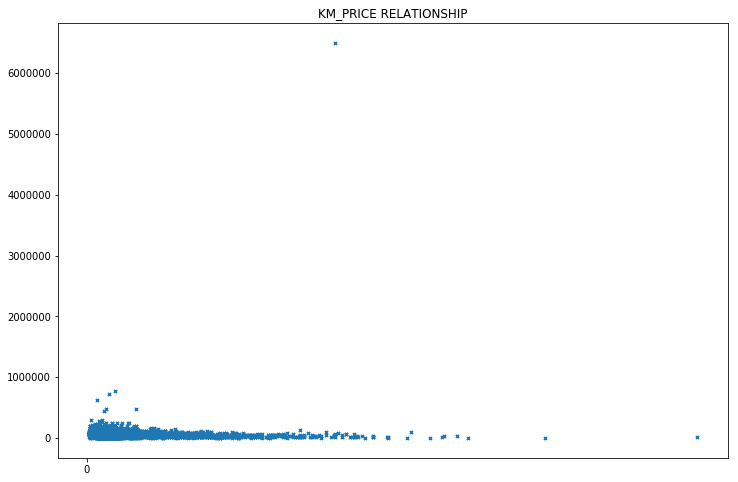

In [143]:
plt.figure(figsize=(12,8))
plt.scatter(y=train_df.Kilometers_Driven,x=train_df.Price,s=10,marker='x')
plt.xticks(np.arange(0,train_df.Price.max(),500))
plt.title('KM_PRICE RELATIONSHIP')
plt.show()

#### There is one outlier whose km_driven is 600000+.... lets check that one

In [144]:
train_df.loc[train_df.Kilometers_Driven > 6000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,5.0,NaN,65.0,258.0,15.97,2993.0,BMW,X5 xDrive 30d M Sport,16.9897,mil_2,2323.221374,cc_4,209.819847


#### so its an outlier , we will devide it by 10..

In [145]:
train_df.loc[train_df.Kilometers_Driven > 6000000,'Kilometers_Driven'] = train_df.loc[train_df.Kilometers_Driven > 6000000,'Kilometers_Driven']/10

In [146]:
train_df.loc[train_df.Kilometers_Driven > 6000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,power,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean


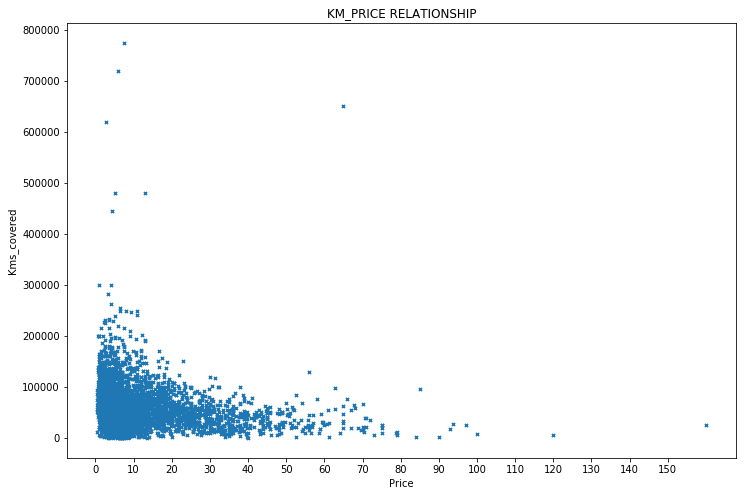

In [147]:
plt.figure(figsize=(12,8))
plt.scatter(y=train_df.Kilometers_Driven,x=train_df.Price,s=10,marker='x')
plt.xticks(np.arange(0,train_df.Price.max(),10))
plt.title('KM_PRICE RELATIONSHIP')
plt.xlabel('Price')
plt.ylabel('Kms_covered')
plt.show()

In [148]:
train_df.Kilometers_Driven.corr(train_df.Price)

-0.15200114237857493

In [149]:
train_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
                    ..
Brand                0
car_name             0
brand_mean_mil       0
mil_category         0
mean_cc              0
cc_category          0
power_mean           1
Length: 20, dtype: int64

In [150]:
train_df.Kilometers_Driven.value_counts(bins=2)

(-603.8299999999999, 387585.5]    6012
(387585.5, 775000.0]                 7
Name: Kilometers_Driven, dtype: int64

In [151]:
train_df.Kilometers_Driven.describe()

count      6019.000000
mean      57766.458050
std       38637.486935
min         171.000000
25%       34000.000000
50%       53000.000000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

In [152]:
train_df.Kilometers_Driven.min()

171.0

In [153]:
km_bins = [-1,6000,10000000]
km_label = ['km_'+str(i) for i in range(1,3)]
train_df['km_category'] = pd.cut(train_df.Kilometers_Driven,bins=km_bins,labels=km_label)

In [154]:
train_df.groupby('km_category').Price.mean()

km_category
km_1    12.407653
km_2     9.431003
Name: Price, dtype: float64

In [155]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,...,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean,km_category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,5.0,NaN,1.75,...,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1,74.245617,km_2
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,5.0,NaN,12.50,...,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2,92.229726,km_2
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61 Lakh,4.50,...,18.20,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2,108.541131,km_2
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,7.0,NaN,6.00,...,20.77,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2,74.245617,km_2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,NaN,17.74,...,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3,192.106043,km_2


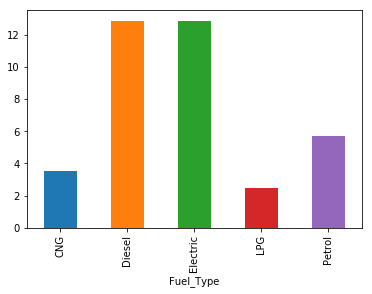

In [156]:
train_df.groupby('Fuel_Type').Price.mean().plot(kind='bar')

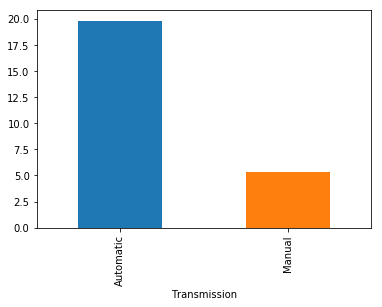

In [157]:
train_df.groupby('Transmission').Price.mean().plot(kind='bar')

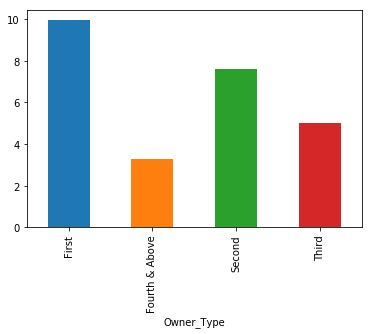

In [158]:
train_df.groupby('Owner_Type').Price.mean().plot(kind='bar')

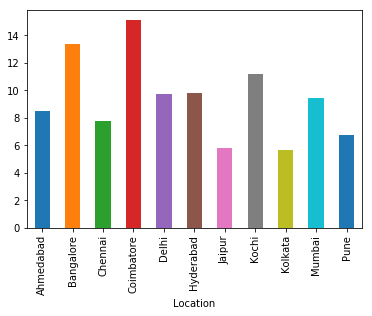

In [159]:
train_df.groupby('Location').Price.mean().plot(kind='bar')

In [160]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,...,mileage,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean,km_category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,5.0,NaN,1.75,...,26.60,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1,74.245617,km_2
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,5.0,NaN,12.50,...,19.67,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2,92.229726,km_2
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61 Lakh,4.50,...,18.20,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2,108.541131,km_2
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,7.0,NaN,6.00,...,20.77,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2,74.245617,km_2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,NaN,17.74,...,15.20,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3,192.106043,km_2


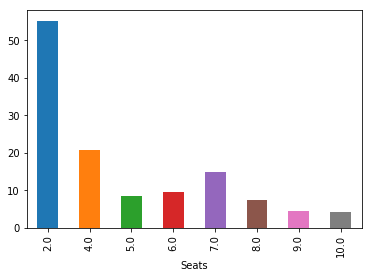

In [161]:
train_df.groupby('Seats').Price.mean().plot(kind='bar')

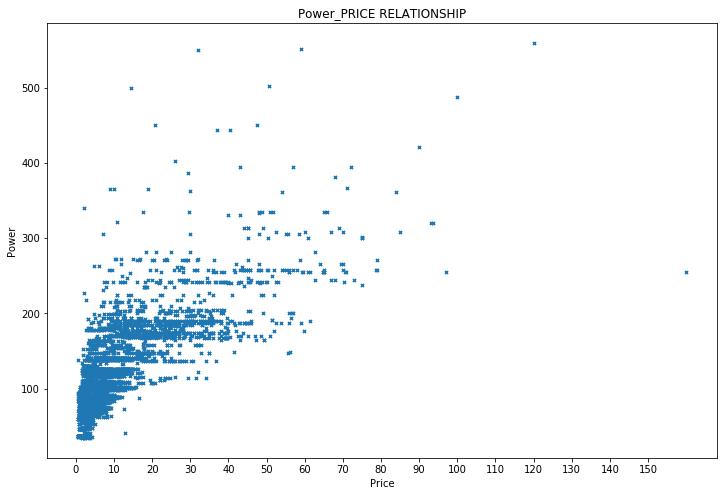

In [162]:
plt.figure(figsize=(12,8))
plt.scatter(y=train_df.power,x=train_df.Price,s=10,marker='x')
plt.xticks(np.arange(0,train_df.Price.max(),10))
plt.title('Power_PRICE RELATIONSHIP')
plt.xlabel('Price')
plt.ylabel('Power')
plt.show()

### looks like very strong relationship between power and price. Can be a useful feature vector

In [163]:
train_df.power.corr(train_df.Price)

0.7723312542256914

## Hence proved :)

In [164]:
train_df.power.value_counts(bins=8)

(33.673, 99.925]     3226
(99.925, 165.65]     1713
(165.65, 231.375]     840
(231.375, 297.1]      179
(297.1, 362.825]       39
(362.825, 428.55]      12
(494.275, 560.0]        5
(428.55, 494.275]       5
Name: power, dtype: int64

In [165]:
power_bins = [-1,100,170,240,300,370,430,500,1000]
power_label = ['power_'+str(i) for i in range(1,9)]
train_df['power_category'] = pd.cut(train_df.power,bins=power_bins,labels=power_label)

In [166]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,...,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean,km_category,power_category
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,5.0,NaN,1.75,...,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1,74.245617,km_2,power_1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,5.0,NaN,12.50,...,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2,92.229726,km_2,power_2
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61 Lakh,4.50,...,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2,108.541131,km_2,power_1
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,7.0,NaN,6.00,...,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2,74.245617,km_2,power_1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,NaN,17.74,...,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3,192.106043,km_2,power_2


In [167]:
train_df.Year = 2019 - train_df.Year

In [168]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,...,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean,km_category,power_category
0,Maruti Wagon R LXI CNG,Mumbai,9,72000.0,CNG,Manual,First,5.0,NaN,1.75,...,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1,74.245617,km_2,power_1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,4,41000.0,Diesel,Manual,First,5.0,NaN,12.50,...,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2,92.229726,km_2,power_2
2,Honda Jazz V,Chennai,8,46000.0,Petrol,Manual,First,5.0,8.61 Lakh,4.50,...,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2,108.541131,km_2,power_1
3,Maruti Ertiga VDI,Chennai,7,87000.0,Diesel,Manual,First,7.0,NaN,6.00,...,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2,74.245617,km_2,power_1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,6,40670.0,Diesel,Automatic,Second,5.0,NaN,17.74,...,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3,192.106043,km_2,power_2


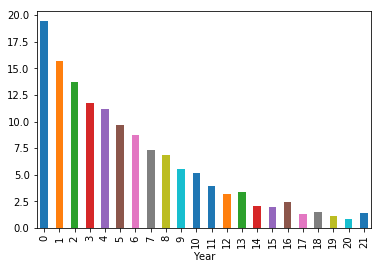

In [169]:
train_df.groupby('Year').Price.mean().plot(kind='bar')

In [170]:
train_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,...,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean,km_category,power_category
0,Maruti Wagon R LXI CNG,Mumbai,9,72000.0,CNG,Manual,First,5.0,NaN,1.75,...,998.0,Maruti,Wagon R LXI CNG,21.505681,mil_5,1149.743333,cc_1,74.245617,km_2,power_1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,4,41000.0,Diesel,Manual,First,5.0,NaN,12.50,...,1582.0,Hyundai,Creta 1.6 CRDi SX Option,18.729106,mil_3,1306.340909,cc_2,92.229726,km_2,power_2
2,Honda Jazz V,Chennai,8,46000.0,Petrol,Manual,First,5.0,8.61 Lakh,4.50,...,1199.0,Honda,Jazz V,18.397204,mil_3,1502.455150,cc_2,108.541131,km_2,power_1
3,Maruti Ertiga VDI,Chennai,7,87000.0,Diesel,Manual,First,7.0,NaN,6.00,...,1248.0,Maruti,Ertiga VDI,21.505681,mil_4,1149.743333,cc_2,74.245617,km_2,power_1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,6,40670.0,Diesel,Automatic,Second,5.0,NaN,17.74,...,1968.0,Audi,A4 New 2.0 TDI Multitronic,15.171780,mil_2,2281.758475,cc_3,192.106043,km_2,power_2


In [171]:
train_df.Name.nunique()

1876

In [172]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'New_Price', 'Price', 'power',
       'mileage', 'cc', 'Brand', 'car_name', 'brand_mean_mil', 'mil_category',
       'mean_cc', 'cc_category', 'power_mean', 'km_category',
       'power_category'],
      dtype='object')

In [173]:
train_df_final = train_df.drop(columns=['Name','Kilometers_Driven','New_Price','power','mileage', 'cc',
                                       'car_name', 'brand_mean_mil','mean_cc','power_mean'])

In [174]:
train_df_final.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,mil_category,cc_category,km_category,power_category
0,Mumbai,9,CNG,Manual,First,5.0,1.75,Maruti,mil_5,cc_1,km_2,power_1
1,Pune,4,Diesel,Manual,First,5.0,12.50,Hyundai,mil_3,cc_2,km_2,power_2
2,Chennai,8,Petrol,Manual,First,5.0,4.50,Honda,mil_3,cc_2,km_2,power_1
3,Chennai,7,Diesel,Manual,First,7.0,6.00,Maruti,mil_4,cc_2,km_2,power_1
4,Coimbatore,6,Diesel,Automatic,Second,5.0,17.74,Audi,mil_2,cc_3,km_2,power_2


In [175]:
train_df_final.isna().sum()

Location          0
Year              0
Fuel_Type         0
Transmission      0
Owner_Type        0
Seats             0
Price             0
Brand             0
mil_category      0
cc_category       0
km_category       0
power_category    0
dtype: int64

In [176]:
train_df_final.columns

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Price', 'Brand', 'mil_category', 'cc_category', 'km_category',
       'power_category'],
      dtype='object')

In [177]:
category_list = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
                 'Brand', 'mil_category', 'cc_category', 'km_category',
                 'power_category']

In [178]:
trainset = pd.get_dummies(data=train_df_final,columns=category_list,drop_first=True)

In [179]:
trainset.shape

(6019, 96)

In [180]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [181]:
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [182]:
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


In [183]:
X = trainset.drop(columns=['Price'])
y = trainset['Price']

In [184]:
X.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,cc_category_cc_6,cc_category_cc_7,km_category_km_2,power_category_power_2,power_category_power_3,power_category_power_4,power_category_power_5,power_category_power_6,power_category_power_7,power_category_power_8
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [186]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]


In [187]:
rmsle=[]

In [188]:
for model in range (len(models)):
    clf=models[model]
    print('fitting model %s' %model)
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))

fitting model 0
fitting model 1
fitting model 2
fitting model 3
fitting model 4


In [189]:
rmsle

[0.2338590975763928,
 1.1709693536027166,
 0.23849522508253088,
 0.3482082810778389,
 0.2746665219663065]

## As we can see can the model 1 *Random Forest Regressor* gives the best results with default parameters
### We can further tune the hyper parameters for better results

In [490]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [5,10,30,50,90]}]
classifier = RandomForestRegressor()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring='neg_mean_squared_log_error',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [491]:
best_accuracy

-0.059920372398061424

In [492]:
best_parameters

{'n_estimators': 90}

In [485]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [191]:
classifier = RandomForestRegressor(n_estimators=90)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.sqrt(mean_squared_log_error(y_pred,y_test))

0.22503811065100357

In [496]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [5,10,30,50,90]}]
classifier = BaggingRegressor()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring='neg_mean_squared_log_error',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('best_accuracy:',best_accuracy)
print('best_parameters:',best_parameters)


best_accuracy: -0.059774604817320436
best_parameters: {'n_estimators': 90}


In [192]:
classifier = BaggingRegressor(n_estimators=90)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.sqrt(mean_squared_log_error(y_pred,y_test))

0.22789866361529193

In [498]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [5,10,30,50,90],'leaf_size':[30,50,100]}]
classifier = KNeighborsRegressor()
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring='neg_mean_squared_log_error',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_ 
print('best_accuracy:',best_accuracy)
print('best_parameters:',best_parameters)


best_accuracy: -0.08464111749621449
best_parameters: {'leaf_size': 30, 'n_neighbors': 5}


In [193]:
classifier = KNeighborsRegressor(n_neighbors=5,leaf_size=30)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.sqrt(mean_squared_log_error(y_pred,y_test))

0.2746665219663065

In [194]:
X.shape

(6019, 95)

In [195]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [196]:
regressor = Sequential()

In [197]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [198]:
regressor.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu', input_dim = 95))
#Adding the second hidden layer
regressor.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
# Adding the output layer
regressor.add(Dense(output_dim = 1, init = 'uniform'))
# Compiling the ANN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [199]:
history = regressor.fit(X_train, y_train, batch_size = 20, nb_epoch = 100)

Epoch 1/100
5417/5417 [==============================] - 1s 257us/step - loss: 116.1605
Epoch 2/100
5417/5417 [==============================] - 0s 63us/step - loss: 45.3736
Epoch 3/100
5417/5417 [==============================] - 0s 62us/step - loss: 33.2791
Epoch 4/100
5417/5417 [==============================] - 0s 62us/step - loss: 27.7158
Epoch 5/100
5417/5417 [==============================] - 0s 63us/step - loss: 24.1323
Epoch 6/100
5417/5417 [==============================] - 0s 63us/step - loss: 21.9202
Epoch 7/100
5417/5417 [==============================] - 0s 62us/step - loss: 20.2533
Epoch 8/100
5417/5417 [==============================] - 0s 63us/step - loss: 19.2048
Epoch 9/100
5417/5417 [==============================] - 0s 62us/step - loss: 18.0268
Epoch 10/100
5417/5417 [==============================] - 0s 63us/step - loss: 17.3136
Epoch 11/100
5417/5417 [==============================] - 0s 63us/step - loss: 16.7181
Epoch 12/100
5417/5417 [==========================

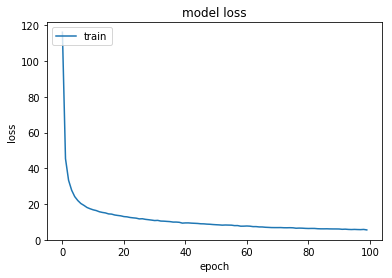

In [200]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [201]:
y_pred = regressor.predict(X_test)

In [202]:
np.sqrt(mean_squared_log_error(y_pred,y_test))

0.21423190302491105

## This NeuNet with 2 hidden layers of 30 neurons gives a fairly good prediction on Trainset

In [203]:
def my_rmsle(y_pred,y_test):
    return(np.mean(np.log(y_pred) - np.log(y_test)))

In [204]:
type(y_test.values)

numpy.ndarray

In [205]:
type(y_pred)

numpy.ndarray

In [206]:
np.mean(np.log(y_test.values + 1) - np.log(y_pred + 1))

-0.028942478887616387

# Data engineering on test set
### Normally its a good practice to concatenate both Train and test set and then do the feature engineering on the combined dataset
### After creating panda dummies , It helps in creating feature names(col names) which are same in both train and testset, otherwise we can face a dimension mismatch in test and trainsets

#### **HERE I HAVE NOT DONE THE  MENTIONED APPROACH, BUT WILL FOLLOW THE SAME ON OTHER DATASETS

In [471]:
test_df = pd.read_excel('Data_Test.xlsx')

In [472]:
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [473]:
test_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [474]:
test_df.loc[test_df.Power.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.5 kmpl,NaN,NaN,NaN,NaN
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59 kmpl,NaN,NaN,NaN,NaN
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0 kmpl,NaN,NaN,NaN,NaN
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN
624,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN,NaN
632,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN
658,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.6 kmpl,NaN,NaN,NaN,NaN
666,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1 kmpl,NaN,NaN,NaN,NaN
861,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN,NaN
883,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.3 kmpl,NaN,NaN,NaN,NaN


So we are getting 10 entries where no infos about Engine,Power and Seats are given

In [475]:
test_df[['Brand','car_name']] = test_df.Name.str.split(' ',n=1,expand=True)
test_df[['power','hp']] = test_df.Power.str.split(expand=True)
test_df.drop(columns=['Power','hp'],inplace=True)
test_df[['mileage','mil_unit']] = test_df.Mileage.str.split(expand=True)
test_df.drop(columns=['mil_unit','Mileage'],inplace=True)
test_df[['cc','cc_unit']] = test_df.Engine.str.split(expand=True)
test_df.head()
test_df.drop(columns=['Engine','cc_unit'],inplace=True)

In [476]:
test_df.loc[test_df.power.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,NaN,NaN,Skoda,Laura 1.8 TSI Ambition,NaN,17.5,NaN
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,NaN,NaN,Toyota,Etios Liva Diesel TRD Sportivo,NaN,23.59,NaN
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,NaN,NaN,Hyundai,i20 new Sportz AT 1.4,NaN,15.0,NaN
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,Mahindra,TUV 300 P4,NaN,0.0,NaN
624,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,NaN,NaN,BMW,5 Series 520d Sedan,NaN,18.48,NaN
632,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,NaN,NaN,Maruti,Swift 1.3 VXi,NaN,16.1,NaN
658,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,NaN,NaN,Fiat,Punto 1.4 Emotion,NaN,14.6,NaN
666,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,NaN,NaN,Maruti,Swift 1.3 VXi,NaN,16.1,NaN
861,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,NaN,NaN,BMW,5 Series 520d Sedan,NaN,18.48,NaN
883,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,NaN,NaN,Toyota,Etios Liva V,NaN,18.3,NaN


In [477]:
test_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  11
New_Price            1052
Brand                   0
car_name                0
power                  10
mileage                 0
cc                     10
dtype: int64

In [478]:
test_df.loc[test_df.power.isna(),'Name'].unique()

array(['Skoda Laura 1.8 TSI Ambition',
       'Toyota Etios Liva Diesel TRD Sportivo',
       'Hyundai i20 new Sportz AT 1.4', 'Mahindra TUV 300 P4',
       'BMW 5 Series 520d Sedan', 'Maruti Swift 1.3 VXi',
       'Fiat Punto 1.4 Emotion', 'Toyota Etios Liva V'], dtype=object)

In [479]:
test_index = test_df.loc[test_df.power.isna()].index
test_index

Int64Index([23, 522, 525, 614, 624, 632, 658, 666, 861, 883], dtype='int64')

In [480]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'New_Price', 'Price', 'power',
       'mileage', 'cc', 'Brand', 'car_name', 'brand_mean_mil', 'mil_category',
       'mean_cc', 'cc_category', 'power_mean', 'km_category',
       'power_category'],
      dtype='object')

In [481]:
for i in test_index:
    #print(test_df.iloc[i,12],' cc: ',train_df.loc[train_df.Brand == test_df.iloc[i,12],'mean_cc'].mean())
    #print(test_df.iloc[i,12],' mean_power: ',train_df.loc[train_df.Brand == test_df.iloc[i,12],'power_mean'].mean())
    #print(test_df.iloc[i,12],' Seats: ',train_df.loc[train_df.Name == test_df.iloc[i,0],'Seats'].mean())
    
    test_df.iloc[i,11] = train_df.loc[train_df.Name == test_df.iloc[i,0],'power'].mean()
    test_df.iloc[i,13] = train_df.loc[train_df.Name == test_df.iloc[i,0],'cc'].mean()
    test_df.iloc[i,7] = train_df.loc[train_df.Name == test_df.iloc[i,0],'Seats'].mean()
    

In [482]:
test_df.iloc[test_index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,NaN,NaN,Skoda,Laura 1.8 TSI Ambition,NaN,17.5,NaN
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,NaN,NaN,Toyota,Etios Liva Diesel TRD Sportivo,NaN,23.59,NaN
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,NaN,NaN,Hyundai,i20 new Sportz AT 1.4,NaN,15.0,NaN
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,Mahindra,TUV 300 P4,NaN,0.0,NaN
624,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,5.0,NaN,BMW,5 Series 520d Sedan,209.82,18.48,2323.22
632,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,5.0,NaN,Maruti,Swift 1.3 VXi,74.2456,16.1,1149.74
658,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,5.0,NaN,Fiat,Punto 1.4 Emotion,87.1557,14.6,1267.2
666,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,5.0,NaN,Maruti,Swift 1.3 VXi,74.2456,16.1,1149.74
861,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,5.0,NaN,BMW,5 Series 520d Sedan,209.82,18.48,2323.22
883,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,5.0,NaN,Toyota,Etios Liva V,103.911,18.3,1754.26


In [489]:
test_df.loc[test_df.power.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,5.0,NaN,Skoda,Laura 1.8 TSI Ambition,NaN,17.5,NaN
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva Diesel TRD Sportivo,NaN,23.59,NaN
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,5.0,NaN,Hyundai,i20 new Sportz AT 1.4,NaN,15.0,NaN
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,9.0,NaN,Mahindra,TUV 300 P4,NaN,0.0,NaN


In [437]:
null_index = test_df.loc[test_df.power.isna()].index

In [490]:
for i in null_index:
    #print(test_df.iloc[i,12],' cc: ',train_df.loc[train_df.Brand == test_df.iloc[i,12],'mean_cc'].mean())
    #print(test_df.iloc[i,12],' mean_power: ',train_df.loc[train_df.Brand == test_df.iloc[i,12],'power_mean'].mean())
    #print(test_df.iloc[i,12],' Seats: ',train_df.loc[train_df.Name == test_df.iloc[i,0],'Seats'].mean())
    
    test_df.iloc[i,11] = train_df.loc[train_df.Brand == test_df.iloc[i,9],'power_mean'].mean()
    test_df.iloc[i,13] = train_df.loc[train_df.Brand == test_df.iloc[i,9],'mean_cc'].mean()

In [491]:
test_df.loc[null_index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,5.0,NaN,Skoda,Laura 1.8 TSI Ambition,126.737,17.5,1786.39
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva Diesel TRD Sportivo,128.921,23.59,2311.52
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,5.0,NaN,Hyundai,i20 new Sportz AT 1.4,92.2297,15.0,1306.34
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,9.0,NaN,Mahindra,TUV 300 P4,121.286,0.0,2126.47


In [492]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'New_Price', 'Price', 'power',
       'mileage', 'cc', 'Brand', 'car_name', 'brand_mean_mil', 'mil_category',
       'mean_cc', 'cc_category', 'power_mean', 'km_category',
       'power_category'],
      dtype='object')

In [484]:
test_df.loc[test_df.Seats.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,NaN,NaN,Skoda,Laura 1.8 TSI Ambition,NaN,17.5,NaN
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,NaN,NaN,Toyota,Etios Liva Diesel TRD Sportivo,NaN,23.59,NaN
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,NaN,NaN,Hyundai,i20 new Sportz AT 1.4,NaN,15.0,NaN
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,Mahindra,TUV 300 P4,NaN,0.0,NaN
938,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,NaN,NaN,Honda,Jazz 2020 Petrol,88.7,0.0,1199


In [485]:
null_seats_index = test_df.loc[test_df.Seats.isna()].index

In [486]:
null_seats_capacity = [5,5,5,9,5]

In [487]:
j = 0
for i in null_seats_index:
    test_df.iloc[i,7] = null_seats_capacity[j]
    j += 1

In [493]:
test_df.iloc[null_seats_index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
23,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,5.0,NaN,Skoda,Laura 1.8 TSI Ambition,126.737,17.5,1786.39
522,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva Diesel TRD Sportivo,128.921,23.59,2311.52
525,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,5.0,NaN,Hyundai,i20 new Sportz AT 1.4,92.2297,15.0,1306.34
614,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,9.0,NaN,Mahindra,TUV 300 P4,121.286,0.0,2126.47
938,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,5.0,NaN,Honda,Jazz 2020 Petrol,88.7,0.0,1199


Now all the Seats column entries has been rightly changed

In [494]:
test_df.isna().sum().sort_values(ascending=False)

New_Price            1052
cc                      0
mileage                 0
power                   0
car_name                0
Brand                   0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

As we can see all the null values has been taken care of except New_Price, which we are not considering in our final dataset

In [495]:
test_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,4.0,NaN,Maruti,Alto K10 LXI CNG,58.2,32.26,998
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,NaN,Maruti,Alto 800 2016-2019 LXI,47.3,24.7,796
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,7.0,25.27 Lakh,Toyota,Innova Crysta Touring Sport 2.4 MT,147.8,13.68,2393
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,null,23.59,1364
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,5.0,NaN,Hyundai,i20 Magna,82.85,18.5,1197


In [496]:
test_df.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,5.285251
std,3.179700,35598.702098,0.829109
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [497]:
test_df.mileage = test_df.mileage.astype('float')

In [498]:
test_df.power = test_df.power.astype('float')

ValueError: could not convert string to float: 'null'

In [499]:
test_df.loc[test_df.power == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,null,23.59,1364
74,Hyundai Santro Xing XL,Bangalore,2007,47000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,null,0.00,1086
122,Toyota Etios Liva GD,Jaipur,2012,121134,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,null,23.59,1364
143,Ford Fiesta 1.4 SXI Duratorq,Jaipur,2008,135000,Diesel,Manual,First,5.0,NaN,Ford,Fiesta 1.4 SXI Duratorq,null,17.80,1399
191,Tata Indica DLS,Chennai,2006,140000,Diesel,Manual,Second,5.0,NaN,Tata,Indica DLS,null,13.50,1405
197,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,null,14.10,1995
259,Toyota Etios GD,Bangalore,2012,90000,Diesel,Manual,First,5.0,NaN,Toyota,Etios GD,null,23.59,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,null,0.00,1086
704,Ford Fiesta 1.4 SXi TDCi,Kolkata,2009,39408,Diesel,Manual,First,5.0,NaN,Ford,Fiesta 1.4 SXi TDCi,null,17.80,1399


In [506]:
null_power_index = test_df.loc[test_df.power == 'null'].index

In [507]:
test_df.iloc[null_power_index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,null,23.59,1364
74,Hyundai Santro Xing XL,Bangalore,2007,47000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,null,0.00,1086
122,Toyota Etios Liva GD,Jaipur,2012,121134,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,null,23.59,1364
143,Ford Fiesta 1.4 SXI Duratorq,Jaipur,2008,135000,Diesel,Manual,First,5.0,NaN,Ford,Fiesta 1.4 SXI Duratorq,null,17.80,1399
191,Tata Indica DLS,Chennai,2006,140000,Diesel,Manual,Second,5.0,NaN,Tata,Indica DLS,null,13.50,1405
197,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,null,14.10,1995
259,Toyota Etios GD,Bangalore,2012,90000,Diesel,Manual,First,5.0,NaN,Toyota,Etios GD,null,23.59,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,null,0.00,1086
704,Ford Fiesta 1.4 SXi TDCi,Kolkata,2009,39408,Diesel,Manual,First,5.0,NaN,Ford,Fiesta 1.4 SXi TDCi,null,17.80,1399


In [508]:
for i in null_power_index:
    test_df.iloc[i,11] = train_df.loc[train_df.Name == test_df.iloc[i,0],'power'].mean()

In [509]:
test_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price            1052
Brand                   0
car_name                0
power                   4
mileage                 0
cc                      0
dtype: int64

In [511]:
test_df.loc[test_df.power.isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
143,Ford Fiesta 1.4 SXI Duratorq,Jaipur,2008,135000,Diesel,Manual,First,5.0,NaN,Ford,Fiesta 1.4 SXI Duratorq,NaN,17.8,1399
197,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,NaN,14.1,1995
435,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,5.0,NaN,Hyundai,Santro LS zipDrive Euro I,NaN,0.0,999
1073,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,5.0,NaN,Hyundai,Santro Xing XG AT eRLX Euro III,NaN,17.0,1086


In [517]:
for i in test_df.loc[test_df.power.isna()].index:
    test_df.iloc[i,11] = train_df.loc[train_df.Brand == test_df.iloc[i,9],'power_mean'].mean()

In [518]:
test_df.loc[test_df.power.isna()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
197,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,NaN,14.1,1995


looks like any cars from hindustan brand was not there in the training set at all

In [519]:
train_df.loc[train_df.Brand == 'Hindustan']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,...,cc,Brand,car_name,brand_mean_mil,mil_category,mean_cc,cc_category,power_mean,km_category,power_category


In [524]:
test_df.loc[test_df.Brand == 'Hindustan','power'] = 54

searched in internet and filled with val 54 bhp

In [526]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 14 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Seats                1234 non-null float64
New_Price            182 non-null object
Brand                1234 non-null object
car_name             1234 non-null object
power                1234 non-null object
mileage              1234 non-null float64
cc                   1234 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 135.0+ KB


In [527]:
test_df.power = test_df.power.astype('float')
test_df.cc = test_df.cc.astype('float')

In [528]:
test_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,4.0,NaN,Maruti,Alto K10 LXI CNG,58.200000,32.26,998.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,NaN,Maruti,Alto 800 2016-2019 LXI,47.300000,24.70,796.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,7.0,25.27 Lakh,Toyota,Innova Crysta Touring Sport 2.4 MT,147.800000,13.68,2393.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,101.422813,23.59,1364.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,5.0,NaN,Hyundai,i20 Magna,82.850000,18.50,1197.0


In [529]:
test_df.Year = 2019 - test_df.Year

In [530]:
test_df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
0,Maruti Alto K10 LXI CNG,Delhi,5,40929,CNG,Manual,First,4.0,NaN,Maruti,Alto K10 LXI CNG,58.200000,32.26,998.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,6,54493,Petrol,Manual,Second,5.0,NaN,Maruti,Alto 800 2016-2019 LXI,47.300000,24.70,796.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2,34000,Diesel,Manual,First,7.0,25.27 Lakh,Toyota,Innova Crysta Touring Sport 2.4 MT,147.800000,13.68,2393.0
3,Toyota Etios Liva GD,Hyderabad,7,139000,Diesel,Manual,First,5.0,NaN,Toyota,Etios Liva GD,101.422813,23.59,1364.0
4,Hyundai i20 Magna,Mumbai,5,29000,Petrol,Manual,First,5.0,NaN,Hyundai,i20 Magna,82.850000,18.50,1197.0


In [531]:
test_df.describe()

,Year,Kilometers_Driven,Seats,power,mileage,cc
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,5.599676,58507.288493,5.285251,110.159598,18.173857,1594.850986
std,3.179700,35598.702098,0.829109,51.146769,4.464615,563.861265
min,0.000000,1000.000000,2.000000,34.200000,0.000000,624.000000
25%,3.000000,34000.000000,5.000000,75.000000,15.215000,1198.000000
50%,5.000000,54572.500000,5.000000,93.700000,18.250000,1461.000000
75%,8.000000,75000.000000,5.000000,126.320000,21.100000,1968.000000
max,23.000000,350000.000000,10.000000,616.000000,32.260000,5998.000000


we can see there are some entries for which mileage is 0, which are outliers...need to check

In [532]:
test_df.loc[test_df.mileage < 1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
71,Hyundai Santro Xing GL,Ahmedabad,6,63831,Petrol,Manual,First,5.0,NaN,Hyundai,Santro Xing GL,62.000000,0.0,1086.000000
74,Hyundai Santro Xing XL,Bangalore,12,47000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,92.229726,0.0,1086.000000
158,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,7,37000,Diesel,Automatic,First,5.0,NaN,Mercedes-Benz,M-Class ML 350 4Matic,165.000000,0.0,2987.000000
186,Hyundai Santro Xing GL,Ahmedabad,12,78000,Petrol,Manual,First,5.0,NaN,Hyundai,Santro Xing GL,62.000000,0.0,1086.000000
420,Hyundai Santro GLS I - Euro II,Bangalore,8,43189,Petrol,Manual,First,5.0,NaN,Hyundai,Santro GLS I - Euro II,92.229726,0.0,999.000000
435,Hyundai Santro LS zipDrive Euro I,Chennai,17,120000,Petrol,Manual,Fourth & Above,5.0,NaN,Hyundai,Santro LS zipDrive Euro I,92.229726,0.0,999.000000
472,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,3,22177,Diesel,Automatic,First,5.0,NaN,Mercedes-Benz,M-Class ML 350 4Matic,165.000000,0.0,2987.000000
557,Hyundai Santro LS zipPlus,Kolkata,17,80000,Petrol,Manual,First,5.0,NaN,Hyundai,Santro LS zipPlus,92.229726,0.0,1086.000000
614,Mahindra TUV 300 P4,Kolkata,3,27000,Diesel,Manual,First,9.0,NaN,Mahindra,TUV 300 P4,121.285502,0.0,2126.474265
678,Hyundai Santro Xing XL,Jaipur,12,85000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,92.229726,0.0,1086.000000


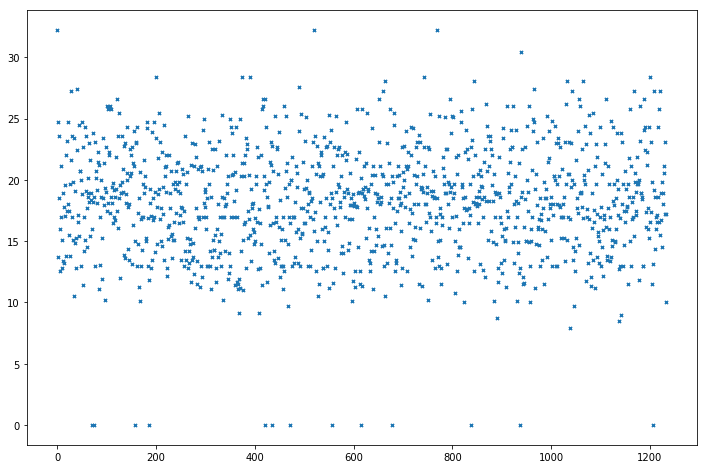

In [533]:
plt.figure(figsize=(12,8))
plt.scatter(x=test_df.index,y=test_df.mileage,marker='x',s=10)
plt.show()

In [534]:
test_df.loc[test_df.mileage < 1]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
71,Hyundai Santro Xing GL,Ahmedabad,6,63831,Petrol,Manual,First,5.0,NaN,Hyundai,Santro Xing GL,62.000000,0.0,1086.000000
74,Hyundai Santro Xing XL,Bangalore,12,47000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,92.229726,0.0,1086.000000
158,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,7,37000,Diesel,Automatic,First,5.0,NaN,Mercedes-Benz,M-Class ML 350 4Matic,165.000000,0.0,2987.000000
186,Hyundai Santro Xing GL,Ahmedabad,12,78000,Petrol,Manual,First,5.0,NaN,Hyundai,Santro Xing GL,62.000000,0.0,1086.000000
420,Hyundai Santro GLS I - Euro II,Bangalore,8,43189,Petrol,Manual,First,5.0,NaN,Hyundai,Santro GLS I - Euro II,92.229726,0.0,999.000000
435,Hyundai Santro LS zipDrive Euro I,Chennai,17,120000,Petrol,Manual,Fourth & Above,5.0,NaN,Hyundai,Santro LS zipDrive Euro I,92.229726,0.0,999.000000
472,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,3,22177,Diesel,Automatic,First,5.0,NaN,Mercedes-Benz,M-Class ML 350 4Matic,165.000000,0.0,2987.000000
557,Hyundai Santro LS zipPlus,Kolkata,17,80000,Petrol,Manual,First,5.0,NaN,Hyundai,Santro LS zipPlus,92.229726,0.0,1086.000000
614,Mahindra TUV 300 P4,Kolkata,3,27000,Diesel,Manual,First,9.0,NaN,Mahindra,TUV 300 P4,121.285502,0.0,2126.474265
678,Hyundai Santro Xing XL,Jaipur,12,85000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,92.229726,0.0,1086.000000


In [547]:
import math
null_ind = test_df.loc[test_df.mileage < 1].index
for i in test_df.loc[test_df.mileage < 1].index:
    if math.isnan(train_df.loc[train_df.Name == test_df.iloc[i,0],'mileage'].mean()):
        test_df.iloc[i,12] = train_df.loc[train_df.Brand == test_df.iloc[i,9],'mileage'].mean()
    else:
        test_df.iloc[i,12] = train_df.loc[train_df.Name == test_df.iloc[i,0],'mileage'].mean()

In [548]:
test_df.iloc[null_ind]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
71,Hyundai Santro Xing GL,Ahmedabad,6,63831,Petrol,Manual,First,5.0,NaN,Hyundai,Santro Xing GL,62.000000,18.729106,1086.000000
74,Hyundai Santro Xing XL,Bangalore,12,47000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,92.229726,18.729106,1086.000000
158,Mercedes-Benz M-Class ML 350 4Matic,Bangalore,7,37000,Diesel,Automatic,First,5.0,NaN,Mercedes-Benz,M-Class ML 350 4Matic,165.000000,13.891761,2987.000000
186,Hyundai Santro Xing GL,Ahmedabad,12,78000,Petrol,Manual,First,5.0,NaN,Hyundai,Santro Xing GL,62.000000,18.729106,1086.000000
420,Hyundai Santro GLS I - Euro II,Bangalore,8,43189,Petrol,Manual,First,5.0,NaN,Hyundai,Santro GLS I - Euro II,92.229726,18.729106,999.000000
435,Hyundai Santro LS zipDrive Euro I,Chennai,17,120000,Petrol,Manual,Fourth & Above,5.0,NaN,Hyundai,Santro LS zipDrive Euro I,92.229726,19.270507,999.000000
472,Mercedes-Benz M-Class ML 350 4Matic,Coimbatore,3,22177,Diesel,Automatic,First,5.0,NaN,Mercedes-Benz,M-Class ML 350 4Matic,165.000000,13.891761,2987.000000
557,Hyundai Santro LS zipPlus,Kolkata,17,80000,Petrol,Manual,First,5.0,NaN,Hyundai,Santro LS zipPlus,92.229726,18.729106,1086.000000
614,Mahindra TUV 300 P4,Kolkata,3,27000,Diesel,Manual,First,9.0,NaN,Mahindra,TUV 300 P4,121.285502,15.161814,2126.474265
678,Hyundai Santro Xing XL,Jaipur,12,85000,Petrol,Manual,Second,5.0,NaN,Hyundai,Santro Xing XL,92.229726,18.729106,1086.000000


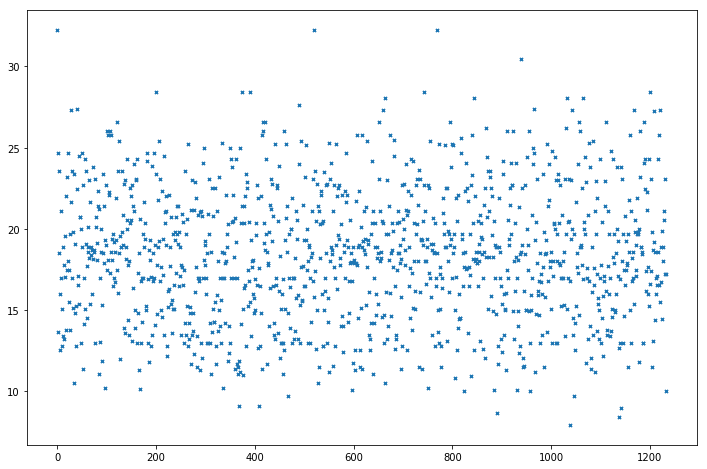

In [549]:
plt.figure(figsize=(12,8))
plt.scatter(x=test_df.index,y=test_df.mileage,marker='x',s=10)
plt.show()

In [550]:
test_df.describe()

,Year,Kilometers_Driven,Seats,power,mileage,cc
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,5.599676,58507.288493,5.285251,110.159598,18.354381,1594.850986
std,3.179700,35598.702098,0.829109,51.146769,4.062010,563.861265
min,0.000000,1000.000000,2.000000,34.200000,7.940000,624.000000
25%,3.000000,34000.000000,5.000000,75.000000,15.300000,1198.000000
50%,5.000000,54572.500000,5.000000,93.700000,18.480000,1461.000000
75%,8.000000,75000.000000,5.000000,126.320000,21.100000,1968.000000
max,23.000000,350000.000000,10.000000,616.000000,32.260000,5998.000000


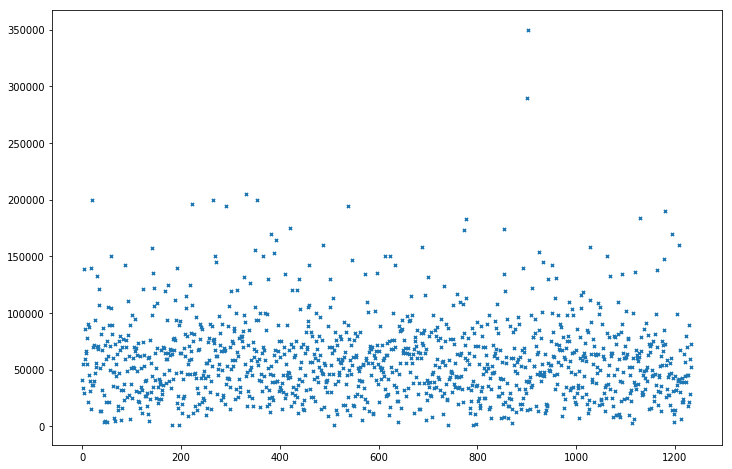

In [551]:
plt.figure(figsize=(12,8))
plt.scatter(x=test_df.index,y=test_df.Kilometers_Driven,marker='x',s=10)
plt.show()


In [553]:
test_df.loc[test_df.Kilometers_Driven > 250000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Brand,car_name,power,mileage,cc
900,ISUZU D-MAX V-Cross 4X4,Jaipur,2,290000,Diesel,Manual,First,5.0,NaN,ISUZU,D-MAX V-Cross 4X4,134.0,12.4,2499.0
902,Maruti Swift Dzire Tour LDI,Jaipur,7,350000,Diesel,Manual,First,5.0,NaN,Maruti,Swift Dzire Tour LDI,74.0,23.4,1248.0


In [554]:
train_df.Kilometers_Driven.mean()

57766.458049509885

In [555]:
test_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'New_Price', 'Brand', 'car_name',
       'power', 'mileage', 'cc'],
      dtype='object')

In [556]:
train_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'New_Price', 'Price', 'power',
       'mileage', 'cc', 'Brand', 'car_name', 'brand_mean_mil', 'mil_category',
       'mean_cc', 'cc_category', 'power_mean', 'km_category',
       'power_category'],
      dtype='object')

In [558]:
test_df_final = test_df.drop(columns=['Name','New_Price','car_name'])

In [560]:
test_df_final.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,power,mileage,cc
0,Delhi,5,40929,CNG,Manual,First,4.0,Maruti,58.200000,32.26,998.0
1,Coimbatore,6,54493,Petrol,Manual,Second,5.0,Maruti,47.300000,24.70,796.0
2,Mumbai,2,34000,Diesel,Manual,First,7.0,Toyota,147.800000,13.68,2393.0
3,Hyderabad,7,139000,Diesel,Manual,First,5.0,Toyota,101.422813,23.59,1364.0
4,Mumbai,5,29000,Petrol,Manual,First,5.0,Hyundai,82.850000,18.50,1197.0


In [561]:
train_df_final.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,mil_category,cc_category,km_category,power_category
0,Mumbai,9,CNG,Manual,First,5.0,1.75,Maruti,mil_5,cc_1,km_2,power_1
1,Pune,4,Diesel,Manual,First,5.0,12.50,Hyundai,mil_3,cc_2,km_2,power_2
2,Chennai,8,Petrol,Manual,First,5.0,4.50,Honda,mil_3,cc_2,km_2,power_1
3,Chennai,7,Diesel,Manual,First,7.0,6.00,Maruti,mil_4,cc_2,km_2,power_1
4,Coimbatore,6,Diesel,Automatic,Second,5.0,17.74,Audi,mil_2,cc_3,km_2,power_2


In [562]:
mil_bins = [-1,11,16,20,25,29.5,100]
mil_label = ['mil_'+str(i) for i in range(1,7)]
test_df_final['mil_category'] = pd.cut(test_df_final.mileage,bins=mil_bins,labels=mil_label)


In [563]:
cc_bins = [-1,1000,1800,2650,3500,4350,5200,10000]
cc_label = ['cc_'+str(i) for i in range(1,8)]
test_df_final['cc_category'] = pd.cut(test_df_final.cc,bins=cc_bins,labels=cc_label)


In [564]:
km_bins = [-1,6000,10000000]
km_label = ['km_'+str(i) for i in range(1,3)]
test_df_final['km_category'] = pd.cut(test_df_final.Kilometers_Driven,bins=km_bins,labels=km_label)


In [565]:
power_bins = [-1,100,170,240,300,370,430,500,1000]
power_label = ['power_'+str(i) for i in range(1,9)]
test_df_final['power_category'] = pd.cut(test_df_final.power,bins=power_bins,labels=power_label)


In [568]:
test_df_final.drop(columns=['power','mileage','cc','Kilometers_Driven'],inplace=True)
test_df_final.head(5)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Brand,mil_category,cc_category,km_category,power_category
0,Delhi,5,CNG,Manual,First,4.0,Maruti,mil_6,cc_1,km_2,power_1
1,Coimbatore,6,Petrol,Manual,Second,5.0,Maruti,mil_4,cc_1,km_2,power_1
2,Mumbai,2,Diesel,Manual,First,7.0,Toyota,mil_2,cc_3,km_2,power_2
3,Hyderabad,7,Diesel,Manual,First,5.0,Toyota,mil_4,cc_2,km_2,power_2
4,Mumbai,5,Petrol,Manual,First,5.0,Hyundai,mil_3,cc_2,km_2,power_1


In [567]:
train_df_final.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,mil_category,cc_category,km_category,power_category
0,Mumbai,9,CNG,Manual,First,5.0,1.75,Maruti,mil_5,cc_1,km_2,power_1
1,Pune,4,Diesel,Manual,First,5.0,12.50,Hyundai,mil_3,cc_2,km_2,power_2
2,Chennai,8,Petrol,Manual,First,5.0,4.50,Honda,mil_3,cc_2,km_2,power_1
3,Chennai,7,Diesel,Manual,First,7.0,6.00,Maruti,mil_4,cc_2,km_2,power_1
4,Coimbatore,6,Diesel,Automatic,Second,5.0,17.74,Audi,mil_2,cc_3,km_2,power_2


In [570]:
X.columns

Index(['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Year_1', 'Year_2', 'Year_3', 'Year_4', 'Year_5',
       'Year_6', 'Year_7', 'Year_8', 'Year_9', 'Year_10', 'Year_11', 'Year_12',
       'Year_13', 'Year_14', 'Year_15', 'Year_16', 'Year_17', 'Year_18',
       'Year_19', 'Year_20', 'Year_21', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0',
       'Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
    

In [571]:
category_list_test = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
                 'Brand', 'mil_category', 'cc_category', 'km_category',
                 'power_category']



In [572]:
test_df_final.columns

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats',
       'Brand', 'mil_category', 'cc_category', 'km_category',
       'power_category'],
      dtype='object')

In [579]:
testset = pd.get_dummies(data=test_df_final,columns=category_list)

In [580]:
testset.shape

(1234, 101)

In [576]:
trainset.shape

(6019, 96)

In [581]:
set(trainset.columns) - set(testset.columns)

{'Brand_Force',
 'Brand_Lamborghini',
 'Brand_Smart',
 'Fuel_Type_Electric',
 'Price',
 'Year_18',
 'Year_20',
 'Year_21'}

In [582]:
set(testset.columns) - set(trainset.columns)

{'Brand_Hindustan',
 'Brand_OpelCorsa',
 'Fuel_Type_CNG',
 'Location_Ahmedabad',
 'Owner_Type_First',
 'Seats_2.0',
 'Transmission_Automatic',
 'Year_0',
 'Year_23',
 'cc_category_cc_1',
 'km_category_km_1',
 'mil_category_mil_1',
 'power_category_power_1'}

In [583]:
missing_col = set(trainset.columns) - set(testset.columns)

In [585]:
for i in missing_col:
    testset[i] = 0

In [586]:
set(trainset.columns) - set(testset.columns)

set()

In [588]:
missing = set(testset.columns) - set(trainset.columns)

In [589]:
testset.drop(columns=missing,inplace=True)

In [590]:
testset = testset[trainset.columns]

In [592]:
testset.shape

(1234, 96)

In [593]:
trainset.shape

(6019, 96)

In [594]:
testset.columns == trainset.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [595]:
testset.head(5)

,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,cc_category_cc_6,cc_category_cc_7,km_category_km_2,power_category_power_2,power_category_power_3,power_category_power_4,power_category_power_5,power_category_power_6,power_category_power_7,power_category_power_8
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [596]:
trainset.head()

,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,cc_category_cc_6,cc_category_cc_7,km_category_km_2,power_category_power_2,power_category_power_3,power_category_power_4,power_category_power_5,power_category_power_6,power_category_power_7,power_category_power_8
0,1.75,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,12.50,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,4.50,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,6.00,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,17.74,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [598]:
X.head(5)

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,cc_category_cc_6,cc_category_cc_7,km_category_km_2,power_category_power_2,power_category_power_3,power_category_power_4,power_category_power_5,power_category_power_6,power_category_power_7,power_category_power_8
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [599]:
testset.drop(columns=['Price'],inplace=True)

In [600]:
testset.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [601]:
testset.head(3)

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,cc_category_cc_6,cc_category_cc_7,km_category_km_2,power_category_power_2,power_category_power_3,power_category_power_4,power_category_power_5,power_category_power_6,power_category_power_7,power_category_power_8
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0


In [602]:
test_pred = regressor.predict(testset)

In [629]:
test_pred = test_pred.round(2).reshape(-1)

In [642]:
test_pred[:3]

array([ 2.42,  3.53, 15.52], dtype=float32)

In [636]:
test_pred.shape

(1234,)

In [637]:
d = {'Price':test_pred}

In [638]:
pred = pd.DataFrame(d)

In [639]:
pred.head()

,Price
0,2.42
1,3.53
2,15.52
3,6.56
4,4.21


In [643]:
pred.to_excel('pred.xlsx',index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [644]:
testset.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,cc_category_cc_6,cc_category_cc_7,km_category_km_2,power_category_power_2,power_category_power_3,power_category_power_4,power_category_power_5,power_category_power_6,power_category_power_7,power_category_power_8
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [645]:
test_df_final.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Brand,mil_category,cc_category,km_category,power_category
0,Delhi,5,CNG,Manual,First,4.0,Maruti,mil_6,cc_1,km_2,power_1
1,Coimbatore,6,Petrol,Manual,Second,5.0,Maruti,mil_4,cc_1,km_2,power_1
2,Mumbai,2,Diesel,Manual,First,7.0,Toyota,mil_2,cc_3,km_2,power_2
3,Hyderabad,7,Diesel,Manual,First,5.0,Toyota,mil_4,cc_2,km_2,power_2
4,Mumbai,5,Petrol,Manual,First,5.0,Hyundai,mil_3,cc_2,km_2,power_1


In [646]:
test_df_final['Price'] = test_pred

In [647]:
test_df_final.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Brand,mil_category,cc_category,km_category,power_category,Price
0,Delhi,5,CNG,Manual,First,4.0,Maruti,mil_6,cc_1,km_2,power_1,2.42
1,Coimbatore,6,Petrol,Manual,Second,5.0,Maruti,mil_4,cc_1,km_2,power_1,3.53
2,Mumbai,2,Diesel,Manual,First,7.0,Toyota,mil_2,cc_3,km_2,power_2,15.52
3,Hyderabad,7,Diesel,Manual,First,5.0,Toyota,mil_4,cc_2,km_2,power_2,6.56
4,Mumbai,5,Petrol,Manual,First,5.0,Hyundai,mil_3,cc_2,km_2,power_1,4.21


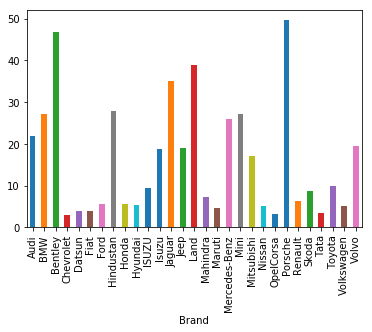

In [648]:
test_df_final.groupby('Brand').Price.mean().plot(kind='bar')

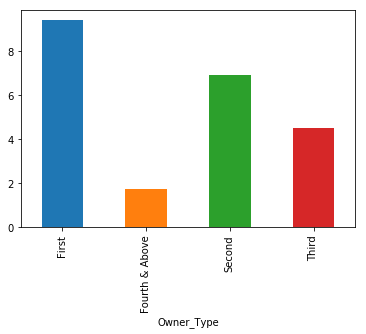

In [650]:
test_df_final.groupby('Owner_Type').Price.mean().plot(kind='bar')

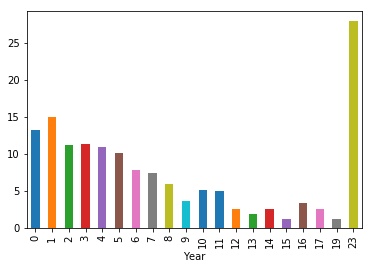

In [651]:
test_df_final.groupby('Year').Price.mean().plot(kind='bar')

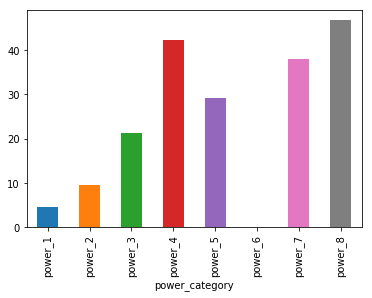

In [652]:
test_df_final.groupby('power_category').Price.mean().plot(kind='bar')

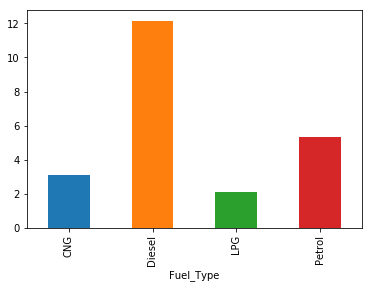

In [654]:
test_df_final.groupby('Fuel_Type').Price.mean().plot(kind='bar')

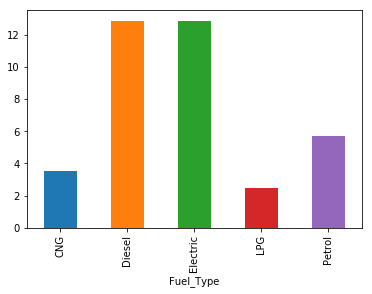

In [655]:
train_df_final.groupby('Fuel_Type').Price.mean().plot(kind='bar')